In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
df = pd.read_excel(r"C:\Users\Tanvi Parihar\AppData\Local\Microsoft\Windows\INetCache\IE\CUHLPSQB\hydrogen_dataset[1].xlsx")
print(df.head(3))

       Fe   Ni     C    Mn      P      S   Cr   Mo    Si  \
0  98.801  0.0  0.27  0.71  0.011  0.018  0.0  0.0  0.19   
1  98.438  0.0  0.22  1.10  0.009  0.023  0.0  0.0  0.21   
2  98.395  0.0  0.24  1.12  0.013  0.022  0.0  0.0  0.21   

   atomic concentration  ...  melting temperature  valence electron number  \
0          9.097390e+22  ...           1813.67996                  1.05774   
1          9.390180e+22  ...           1811.46579                  1.08041   
2          9.405450e+22  ...           1811.76348                  1.08232   

   ionic radii  enthalpy of vacancies    hardness  modulus of rigidity  \
0     0.781857              174.33656  485.636390             81.71758   
1     0.782600              173.95464  484.633125             81.74022   
2     0.782521              173.97314  484.462090             81.72254   

   poisson's ratio  work function  young's modulus     ys  
0         0.440851       4.491749        209.86082  338.0  
1         0.456630       4.49

In [32]:
# Drop columns with all missing values
df = df.dropna(axis=1, how='all')

# Replace missing values with 0 (assume element not present)
df = df.fillna(0)
# Handle any remaining NaNs in features BEFORE splitting
X = X.fillna(0)
y = y.fillna(0)  # (optional) if you suspect NaNs in y too


In [33]:
# Ensure target columns exist
target_columns = ['atomic concentration', 'magnetic susceptibility']

for col in target_columns:
    # 1. Convert to string
    df[col] = df[col].astype(str)
    
    # 2. Remove non-visible characters
    df[col] = df[col].str.replace('\u200b', '', regex=False)  # zero-width space
    df[col] = df[col].str.replace('\xa0', '', regex=False)    # non-breaking space
    df[col] = df[col].str.replace(' ', '')                    # normal spaces
    
    # 3. Keep only valid float characters (digits, ., e, E, -)
    df[col] = df[col].str.replace(r'[^\deE\.-]+', '', regex=True)
    
    # 4. Convert to float
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to float; invalid values → NaN
    


In [34]:
print(df[target_columns].dtypes)
print(df[target_columns].head())


atomic concentration       float64
magnetic susceptibility    float64
dtype: object
   atomic concentration  magnetic susceptibility
0          9.097390e+22             2.558210e-08
1          9.390180e+22             2.596050e-08
2          9.405450e+22             2.597560e-08
3          9.345920e+22             2.590490e-08
4          9.147590e+22             2.566230e-08


In [35]:
# Define features and target
X = df.drop(columns=['ys'])  # Features
y = df['ys']                 # Target ys 


In [36]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10000
)

In [37]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [38]:
# Predict on test data
y_pred = model.predict(X_test)


In [39]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [40]:
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 123609.50170866903
R² Score: -0.03200936091340867


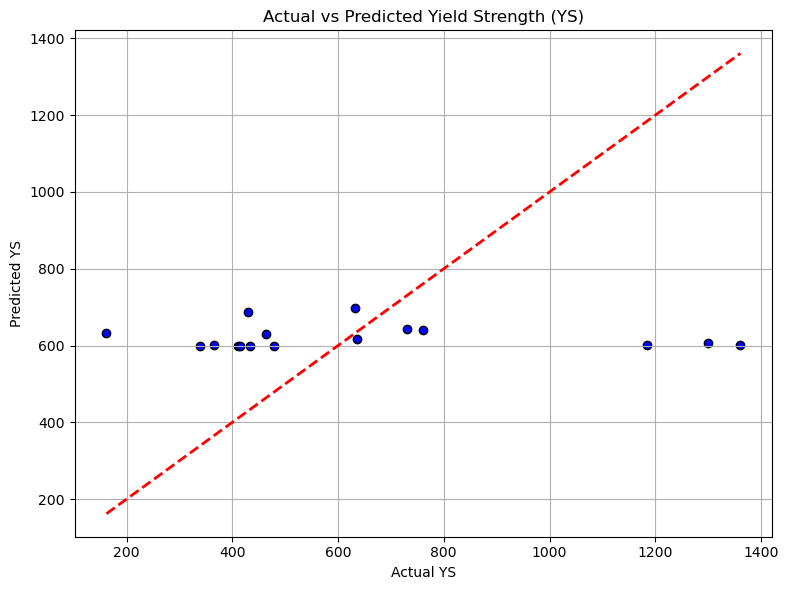

In [41]:
# Plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual YS")
plt.ylabel("Predicted YS")
plt.title("Actual vs Predicted Yield Strength (YS)")
plt.grid(True)
plt.tight_layout()
plt.show()

# KNN

       Fe   Ni     C    Mn      P      S   Cr   Mo    Si  \
0  98.801  0.0  0.27  0.71  0.011  0.018  0.0  0.0  0.19   
1  98.438  0.0  0.22  1.10  0.009  0.023  0.0  0.0  0.21   
2  98.395  0.0  0.24  1.12  0.013  0.022  0.0  0.0  0.21   

   atomic concentration  ...  melting temperature  valence electron number  \
0          9.097390e+22  ...           1813.67996                  1.05774   
1          9.390180e+22  ...           1811.46579                  1.08041   
2          9.405450e+22  ...           1811.76348                  1.08232   

   ionic radii  enthalpy of vacancies    hardness  modulus of rigidity  \
0     0.781857              174.33656  485.636390             81.71758   
1     0.782600              173.95464  484.633125             81.74022   
2     0.782521              173.97314  484.462090             81.72254   

   poisson's ratio  work function  young's modulus     ys  
0         0.440851       4.491749        209.86082  338.0  
1         0.456630       4.49

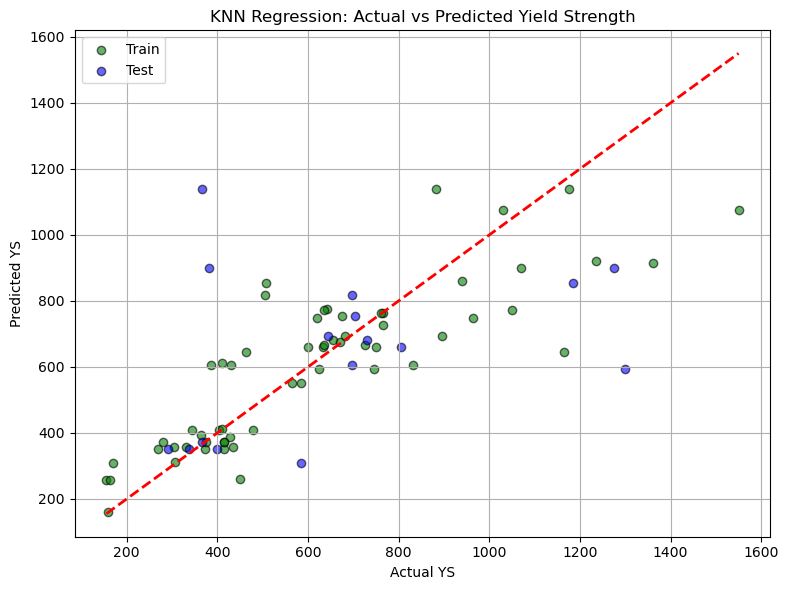

In [42]:
# ================== Import Libraries ==================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

# ================== Load and Preprocess Data ==================
df = pd.read_excel(r"C:\Users\Tanvi Parihar\AppData\Local\Microsoft\Windows\INetCache\IE\CUHLPSQB\hydrogen_dataset[1].xlsx")
print(df.head(3))
# Drop columns with all missing values
df = df.dropna(axis=1, how='all')

# Replace missing values with 0 (assume element not present)
df = df.fillna(0)
# Handle any remaining NaNs in features BEFORE splitting
X = X.fillna(0)
y = y.fillna(0)  # (optional) if you suspect NaNs in y too
# Ensure target columns exist
target_columns = ['atomic concentration', 'magnetic susceptibility']

for col in target_columns:
    # 1. Convert to string
    df[col] = df[col].astype(str)
    
    # 2. Remove non-visible characters
    df[col] = df[col].str.replace('\u200b', '', regex=False)  # zero-width space
    df[col] = df[col].str.replace('\xa0', '', regex=False)    # non-breaking space
    df[col] = df[col].str.replace(' ', '')                    # normal spaces
    
    # 3. Keep only valid float characters (digits, ., e, E, -)
    df[col] = df[col].str.replace(r'[^\deE\.-]+', '', regex=True)
    
    # 4. Convert to float
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to float; invalid values → NaN
print(df[target_columns].dtypes)
print(df[target_columns].head())
 # Define features and target
X = df.drop(columns=['ys'])  # Features
y = df['ys']                 # Target ys 
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================== KNN Model with Hyperparameter Tuning ==================
param_grid = {'n_neighbors': list(range(2, 21))}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
knn_model = grid_search.best_estimator_

# ================== Predictions ==================
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# ================== Evaluation ==================
print("Best k:", best_k)
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

# ================== Plot: Actual vs Predicted ==================
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='green', label='Train', alpha=0.6, edgecolor='k')
plt.scatter(y_test, y_test_pred, color='blue', label='Test', alpha=0.6, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual YS")
plt.ylabel("Predicted YS")
plt.title("KNN Regression: Actual vs Predicted Yield Strength")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()   

# Decision tree

       Fe   Ni     C    Mn      P      S   Cr   Mo    Si  \
0  98.801  0.0  0.27  0.71  0.011  0.018  0.0  0.0  0.19   
1  98.438  0.0  0.22  1.10  0.009  0.023  0.0  0.0  0.21   
2  98.395  0.0  0.24  1.12  0.013  0.022  0.0  0.0  0.21   

   atomic concentration  ...  melting temperature  valence electron number  \
0          9.097390e+22  ...           1813.67996                  1.05774   
1          9.390180e+22  ...           1811.46579                  1.08041   
2          9.405450e+22  ...           1811.76348                  1.08232   

   ionic radii  enthalpy of vacancies    hardness  modulus of rigidity  \
0     0.781857              174.33656  485.636390             81.71758   
1     0.782600              173.95464  484.633125             81.74022   
2     0.782521              173.97314  484.462090             81.72254   

   poisson's ratio  work function  young's modulus     ys  
0         0.440851       4.491749        209.86082  338.0  
1         0.456630       4.49

C:\Users\Tanvi Parihar\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2}
Train MSE: 40697.183933333334
Train R²: 0.5667757438626975
Test MSE: 72523.12896388888
Test R²: 0.2997219955120478


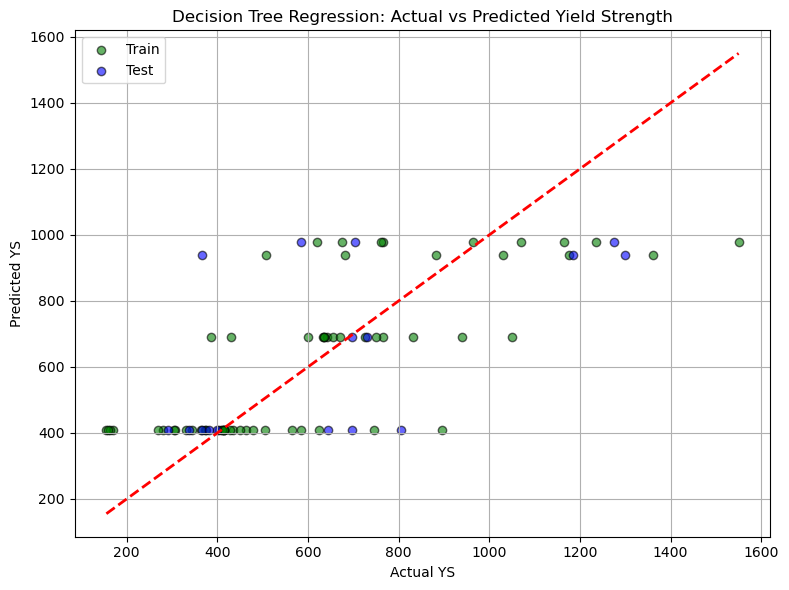

In [43]:
# ================== Import Libraries ==================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
# ================== Load and Preprocess Data ==================
df = pd.read_excel(r"C:\Users\Tanvi Parihar\AppData\Local\Microsoft\Windows\INetCache\IE\CUHLPSQB\hydrogen_dataset[1].xlsx")
print(df.head(3))
# Drop columns with all missing values
df = df.dropna(axis=1, how='all')

# Replace missing values with 0 (assume element not present)
df = df.fillna(0)
# Handle any remaining NaNs in features BEFORE splitting
X = X.fillna(0)
y = y.fillna(0)  # (optional) if you suspect NaNs in y too
# Ensure target columns exist
target_columns = ['atomic concentration', 'magnetic susceptibility']

for col in target_columns:
    # 1. Convert to string
    df[col] = df[col].astype(str)
    
    # 2. Remove non-visible characters
    df[col] = df[col].str.replace('\u200b', '', regex=False)  # zero-width space
    df[col] = df[col].str.replace('\xa0', '', regex=False)    # non-breaking space
    df[col] = df[col].str.replace(' ', '')                    # normal spaces
    
    # 3. Keep only valid float characters (digits, ., e, E, -)
    df[col] = df[col].str.replace(r'[^\deE\.-]+', '', regex=True)
    
    # 4. Convert to float
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to float; invalid values → NaN
print(df[target_columns].dtypes)
print(df[target_columns].head())
 # Define features and target
X = df.drop(columns=['ys'])  # Features
y = df['ys']                 # Target ys 
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================== Decision Tree with Hyperparameter Tuning ==================
param_grid = {
    'max_depth': list(range(2, 21)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# ================== Predictions ==================
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# ================== Evaluation ==================
print("Best Parameters:", grid_search.best_params_)
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

# ================== Plot: Actual vs Predicted ==================
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='green', label='Train', alpha=0.6, edgecolor='k')
plt.scatter(y_test, y_test_pred, color='blue', label='Test', alpha=0.6, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual YS")
plt.ylabel("Predicted YS")
plt.title("Decision Tree Regression: Actual vs Predicted Yield Strength")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# random forest

# Ada boost

       Fe   Ni     C    Mn      P      S   Cr   Mo    Si  \
0  98.801  0.0  0.27  0.71  0.011  0.018  0.0  0.0  0.19   
1  98.438  0.0  0.22  1.10  0.009  0.023  0.0  0.0  0.21   
2  98.395  0.0  0.24  1.12  0.013  0.022  0.0  0.0  0.21   

   atomic concentration  ...  melting temperature  valence electron number  \
0          9.097390e+22  ...           1813.67996                  1.05774   
1          9.390180e+22  ...           1811.46579                  1.08041   
2          9.405450e+22  ...           1811.76348                  1.08232   

   ionic radii  enthalpy of vacancies    hardness  modulus of rigidity  \
0     0.781857              174.33656  485.636390             81.71758   
1     0.782600              173.95464  484.633125             81.74022   
2     0.782521              173.97314  484.462090             81.72254   

   poisson's ratio  work function  young's modulus     ys  
0         0.440851       4.491749        209.86082  338.0  
1         0.456630       4.49

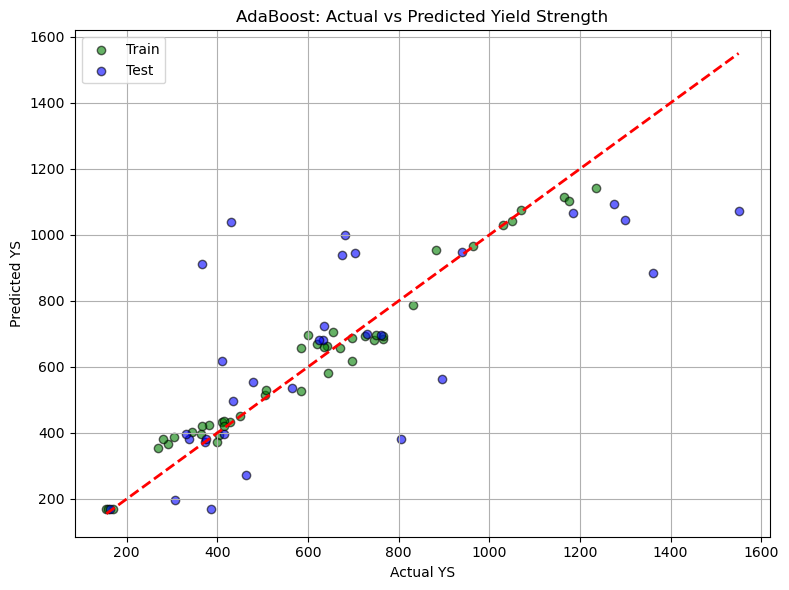

In [45]:
# ================== Import Libraries ==================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor

# ================== Load and Preprocess Data ==================
df = pd.read_excel(r"C:\Users\Tanvi Parihar\AppData\Local\Microsoft\Windows\INetCache\IE\CUHLPSQB\hydrogen_dataset[1].xlsx")
print(df.head(3))
# Drop columns with all missing values
df = df.dropna(axis=1, how='all')

# Replace missing values with 0 (assume element not present)
df = df.fillna(0)
# Handle any remaining NaNs in features BEFORE splitting
X = X.fillna(0)
y = y.fillna(0)  # (optional) if you suspect NaNs in y too
# Ensure target columns exist
target_columns = ['atomic concentration', 'magnetic susceptibility']

for col in target_columns:
    # 1. Convert to string
    df[col] = df[col].astype(str)
    
    # 2. Remove non-visible characters
    df[col] = df[col].str.replace('\u200b', '', regex=False)  # zero-width space
    df[col] = df[col].str.replace('\xa0', '', regex=False)    # non-breaking space
    df[col] = df[col].str.replace(' ', '')                    # normal spaces
    
    # 3. Keep only valid float characters (digits, ., e, E, -)
    df[col] = df[col].str.replace(r'[^\deE\.-]+', '', regex=True)
    
    # 4. Convert to float
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to float; invalid values → NaN
print(df[target_columns].dtypes)
print(df[target_columns].head())
 # Define features and target
X = df.drop(columns=['ys'])  # Features
y = df['ys']                 # Target ys 
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=10000
)

# ================== AdaBoost with Hyperparameter Tuning ==================
# Define model
ada = AdaBoostRegressor(random_state=42)

# Define hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Grid search
grid_search = GridSearchCV(ada, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# ================== Predictions ==================
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# ================== Evaluation ==================
print("Best Parameters:", grid_search.best_params_)
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

# ================== Plot: Actual vs Predicted ==================
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='green', label='Train', alpha=0.6, edgecolor='k')
plt.scatter(y_test, y_test_pred, color='blue', label='Test', alpha=0.6, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual YS")
plt.ylabel("Predicted YS")
plt.title("AdaBoost: Actual vs Predicted Yield Strength")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# GB

       Fe   Ni     C    Mn      P      S   Cr   Mo    Si  \
0  98.801  0.0  0.27  0.71  0.011  0.018  0.0  0.0  0.19   
1  98.438  0.0  0.22  1.10  0.009  0.023  0.0  0.0  0.21   
2  98.395  0.0  0.24  1.12  0.013  0.022  0.0  0.0  0.21   

   atomic concentration  ...  melting temperature  valence electron number  \
0          9.097390e+22  ...           1813.67996                  1.05774   
1          9.390180e+22  ...           1811.46579                  1.08041   
2          9.405450e+22  ...           1811.76348                  1.08232   

   ionic radii  enthalpy of vacancies    hardness  modulus of rigidity  \
0     0.781857              174.33656  485.636390             81.71758   
1     0.782600              173.95464  484.633125             81.74022   
2     0.782521              173.97314  484.462090             81.72254   

   poisson's ratio  work function  young's modulus     ys  
0         0.440851       4.491749        209.86082  338.0  
1         0.456630       4.49

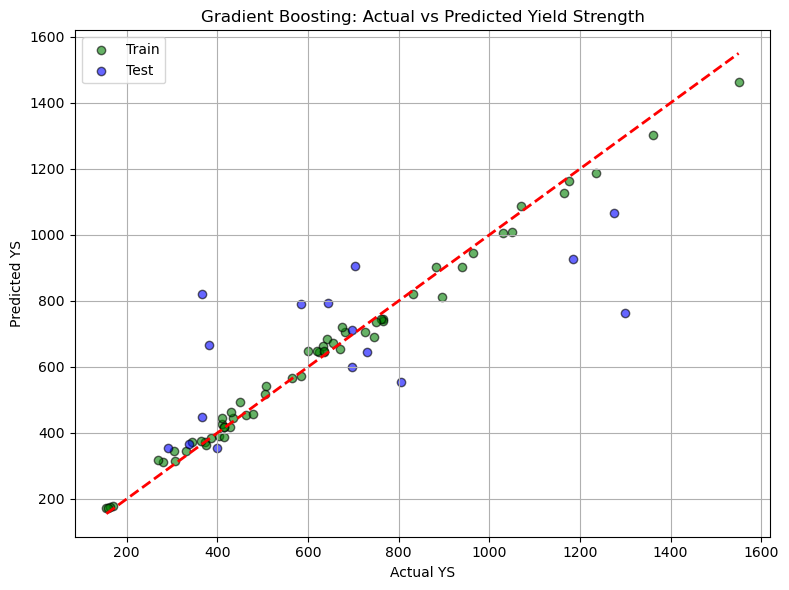

In [5]:
# ================== Import Libraries ==================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# ================== Load and Preprocess Data ==================
df = pd.read_excel(r"C:\Users\Tanvi Parihar\AppData\Local\Microsoft\Windows\INetCache\IE\CUHLPSQB\hydrogen_dataset[1].xlsx")
print(df.head(3))
# Drop columns with all missing values
df = df.dropna(axis=1, how='all')

# Replace missing values in entire dataframe
df = df.fillna(0)

# Define features and target
X = df.drop(columns=['ys'])  # Features
y = df['ys']                 # Target

# (Optional) Handle any remaining NaNs (after defining X and y)
X = X.fillna(0)
y = y.fillna(0)

# Ensure target columns exist
target_columns = ['atomic concentration', 'magnetic susceptibility']

for col in target_columns:
    # 1. Convert to string
    df[col] = df[col].astype(str)
    
    # 2. Remove non-visible characters
    df[col] = df[col].str.replace('\u200b', '', regex=False)  # zero-width space
    df[col] = df[col].str.replace('\xa0', '', regex=False)    # non-breaking space
    df[col] = df[col].str.replace(' ', '')                    # normal spaces
    
    # 3. Keep only valid float characters (digits, ., e, E, -)
    df[col] = df[col].str.replace(r'[^\deE\.-]+', '', regex=True)
    
    # 4. Convert to float
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to float; invalid values → NaN
print(df[target_columns].dtypes)
print(df[target_columns].head())
 # Define features and target
X = df.drop(columns=['ys'])  # Features
y = df['ys']           
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================== Gradient Boosting with Hyperparameter Tuning ==================
# Define model
gbr = GradientBoostingRegressor(random_state=42)

# Define hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}


# Grid search
grid_search = GridSearchCV(gbr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# ================== Predictions ==================
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# ================== Evaluation ==================
print("Best Parameters:", grid_search.best_params_)
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

# ================== Plot: Actual vs Predicted ==================
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='green', label='Train', alpha=0.6, edgecolor='k')
plt.scatter(y_test, y_test_pred, color='blue', label='Test', alpha=0.6, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual YS")
plt.ylabel("Predicted YS")
plt.title("Gradient Boosting: Actual vs Predicted Yield Strength")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#xgboost

In [5]:
import xgboost as xgb
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# ================== Load and Preprocess Data ==================
df = pd.read_excel(r"C:\Users\Tanvi Parihar\OneDrive\Documents\hydrogen embrittlement dataset .xlsx")
# Drop columns with all missing values
df = df.dropna(axis=1, how='all')

# Fill any remaining NaNs
df = df.fillna(0)

# Define features and target
X = df.drop(columns=['ys'])
y = df['ys']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ================== XGBoost with Hyperparameter Tuning ==================
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [200,400],
    'max_depth': [3, 5],
    'learning_rate': [0.03, 0.05],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'reg_alpha': [0.0, 0.1, 0.5, 1],   # L1 regularization (lasso)
    'reg_lambda': [1,5]    # L2 regularization (ridge)
}
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# ================== Predictions ==================
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# ================== Evaluation ==================
print("Best Parameters:", grid_search.best_params_)
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R²:", r2_score(y_test, y_test_pred))


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 5, 'subsample': 0.8}
Train MSE: 7167.006977006628
Train R²: 0.9281775667478434
Test MSE: 43818.13408535253
Test R²: 0.5818868841699184
